#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

Boston Housing dataset loaded successfully!

           pearsonrr
crime      -0.385832
zoned       0.360445
business   -0.483725
river       0.175260
nitrox     -0.427321
rm_avg      0.695360
age        -0.376955
distance    0.249929
rdl_hwy    -0.381626
tax        -0.468536
puptea_ra  -0.507787
b_ra        0.333461
lwsta_ra   -0.737663


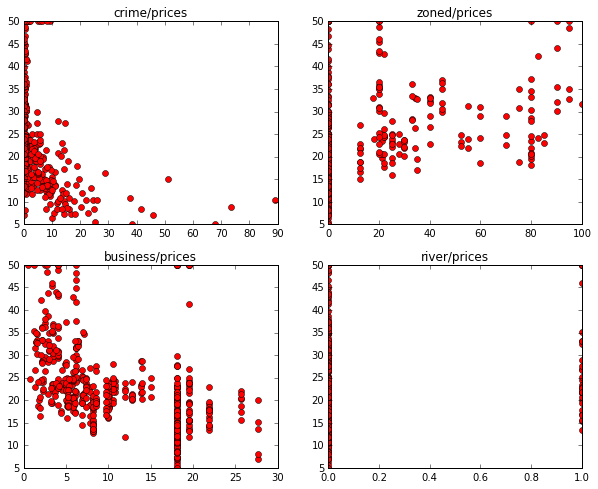

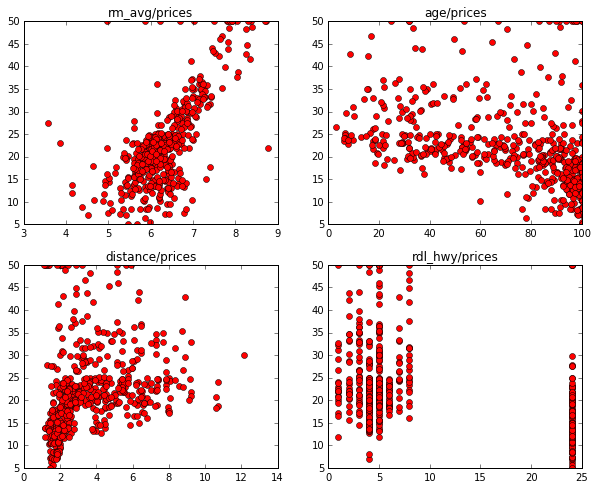

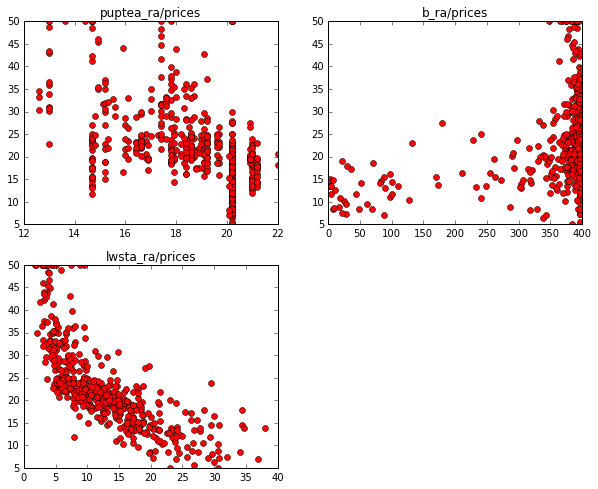

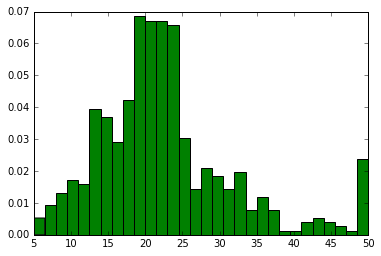

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

from sklearn import datasets
from scipy.stats.stats import pearsonr

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 
                    90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices   = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

# This function that takes housing features and the labels, housing_prices,
# and proceeds to create a numpy array for each feature. It then takes these
# columns and puts them in a list and then a name list is created to be used
# in combination with the column list to find each features pearson score. 
# Pearson scores measure correlation between features and labels and is useful
# for finding the most important features. After it finds all these scores, it
# puts them in a dataframe and the second half of the function plots each features
# correlation using matplotlib.
def featureInfo(housing_features, housing_prices):
    crime     = np.array(housing_features[0:506,0]) 
    zoned     = np.array(housing_features[0:506,1])
    business  = np.array(housing_features[0:506,2])
    river     = np.array(housing_features[0:506,3])
    nitrox    = np.array(housing_features[0:506,4])
    rm_avg    = np.array(housing_features[0:506,5])
    age       = np.array(housing_features[0:506,6])
    distance  = np.array(housing_features[0:506,7])
    rdl_hwy   = np.array(housing_features[0:506,8])
    tax       = np.array(housing_features[0:506,9])
    puptea_ra = np.array(housing_features[0:506,10])
    b_ra      = np.array(housing_features[0:506,11])
    lwsta_ra  = np.array(housing_features[0:506,12])
    
    column_list = [crime, zoned, business, river,
                 nitrox, rm_avg,age, distance, 
                 rdl_hwy, tax,puptea_ra, b_ra,
                 lwsta_ra]
    name_list=['crime', 'zoned', 'business', 'river',
               'nitrox', 'rm_avg', 'age', 'distance',
               'rdl_hwy', 'tax', 'puptea_ra', 'b_ra',
               'lwsta_ra']
    
    pearsonrlist = []
    for each in column_list:
        pearsonscore = pearsonr(each, housing_prices) # pearson scores used to measure correlation
        pearsonrlist.append(pearsonscore)

    pearsonlist = pd.DataFrame(pearsonrlist, 
                               index=name_list,
                               columns={'pearsonr', 'pearsonrr'})
 
    print "\n",pearsonlist[['pearsonrr']]

    i,y,z=1,1,0 
    for each in column_list:
        if i > 4:
            y += 1
            i = 1
        else:
            pl.figure(y,figsize=(10,8))
            pl.subplot(2,2,i)
            pl.plot(each, housing_prices,'ro')
            pl.title('%s/prices'%(name_list[z]))
            i += 1
        z += 1
    pl.show()

    pl.hist(housing_prices,normed=1,bins=30,facecolor='g')
    pl.show()
    return

featureInfo(housing_features,housing_prices)

#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
# Number of houses in the dataset
total_houses = np.size(housing_prices)

# Number of features in the dataset
total_features = housing_features[0].size
    
# Minimum housing value in the dataset
minimum_price = housing_prices[np.argmin(housing_prices)]

# Maximum housing value in the dataset
maximum_price = housing_prices[np.argmax(housing_prices)]

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

** Answer: **
   
**   Of the features available, the three that I feel are most significant are PTRATIO(pupil to teach ratio), RM(average number of rooms per house), and LSTAT(percent lower status of population). The reason I felt these were the most significant were because these features were the most correlated when comparing with housing_prices.**
   
**   The way I looked first at correlation of data was by placing each column of our data which represented different features into individual numpy arrays, and then plotting them against housing_prices values. I then used the matplotlib library that visualized data and graphed each feature compared to the housing_prices looking for correlation in the data. This first step was all intuition and was done by looking for either positive or negative correlation, with few outliers. For example, if you look at the graph showing the average_rooms/housing_prices, you'll see that at 6 rooms and more, all the data is tightly compact and clearly moving positively up, meaning as the average number of rooms per house rose, the housing prices rose as well. The tightly correlated data showed clearly that this was linearly correlated in a positive direction.** 
   
**   The next most obvious correlation was between LSTAT and housing_prices. This data however was negatively correlated meaning that as the LSTAT percentage grew, the housing prices decreased. This also was quite obvious if you thought about it, as it meant that as the percentage of lower-class residents grew in the town, the housing prices decreased. This makes sense if you think intuitively as lower-class residents don't have the money to pay for expensive homes and as more and more residents were lower-class, the average home values needed to decrease for them to afford to live there. The third feature, PTRATIO, was not as easy to tell from simply looking at the graphs. **   
  
**   It was at this point that I decided to prove my theory of positive and negative correlations by looking at the Pearson's correlation data. This function would take two arrays and find the correlation coefficient from -1 to +1. 0 in this case meant no correlation but higher and lower values meant they were either positively or negatively correlated and to what percent they were correlated respectively. As expected, the 2 most correlated features were RM with a positive correlation of 0.695 and LSTAT with a negative correlation of -0.737. The closer to 1 or -1 meant they were more correlated with a score of 1 or -1 meaning 100% correlated. The third most correlated data point turned out to be PTRATIO with a negative correlation of -0.507. This meant as the number of students per teacher rose, meaning less individual attention for education, the housing prices decreased. This can be expected if you think about it because families are extremely interested in a great education and on average, you tend to get a better education if you and your teacher have more one on one time. This simply can't happen in classes that are huge and therefor the education value of the town decreases making families look elsewhere and therefor lower average housing prices due to less demand for houses in the town. **
   
**   It was this high correlation of data that led me to chose these three features due to their strong correlation with the housing prices which is what we are trying to predict. The higher correlation meant that those 3 features were likely to have the most impact on the housing prices and therefor lead us to better predict the housing prices.**

##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [5]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **
   
 ** The values that corresponded to the features chosen above are the RM value, 5.609, the PTRATIO value, 20.2, and finally the LSTAT value, 12.13. **

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [3]:
# Put any import statements you need for this code block here
from sklearn.cross_validation import train_test_split

def shuffle_split_data(housing_features, housing_prices):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = train_test_split(
                                            housing_features, 
                                            housing_prices, 
                                            test_size = 0.30, 
                                            random_state = 42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(
                                            housing_features, 
                                            housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer:**

**   The reason we split the data into training and testing subsets is because we first need to train the model to find a function that closely represents our data and that makes sense of the data we're looking at. The reason we use a testing subset is because we then need to test how accurate our function is at plotting data it has never seen before. That point is particularly important. If we were to train and test our model on the same data, what could happen is called overfitting, where our function works extremely well for our data but isn't general enough to plot new points we haven't seen before. **
   
**   Consider the example where we train our model on some data and because we're not using new testing data, our model plots all the testing points perfectly and it looks like our model is incredibly accurate. But in reality, what's happening, is that our model has already seen this data, and in fact used that data to make our model. When thought of like this, its obvious to think that the model would plot these points perfectly, because ITS ALREADY SEEN THIS DATA! If it's already seen this data, it's easy enough to just look back in memory and plot this point exactly where it did before and when it's "tested", it looks like the test is 100% accurate. What's really happening though is that its data thats already been used to fit the model and of course if tested on that same data will fit the model perfectly, because that same data was used to FIT THE MODEL!**
   
**   This is why it's extremely important to split the training and testing data so when you test the data, you see truly unique data that the model hasn't seen before and is able to accurately test the model. In the case of an overfitting model, the test score will be low because the model is so particular to the training data, that it's not general enough to plot new points it hasn't seen before and this splitting easily shows that because it will have a very high training score but a rather low testing score. What we want, would be a training and testing that are both high and close to one another.**

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [8]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    mse_score = mean_squared_error(y_true, y_predict)
    return mse_score


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer:**

**   The performance metric I believe was the most appropriate for predicting housing prices and analyzing total error was the Mean Squared Error(MSE). The reason I chose this over the other metrics was for several reasons. The first is that accuracy, precision, and recall, and F1 score are all classification metrics. What this means is that they base there scores off if you classified the category correctly. For example, suppose you wanted to classify whether a car was a Dodge or a Ford based on some features. The classification scores would then be how often you classified them correctly. However for regression, we aren't simply classifying into a category, we are actually predicting what the value of the housing price could be. So those 4 metrics automatically are out due to not being regression metrics.**

**   This leaves us with MSE and MAE. The reason I chose MSE over MAE was because while MSE is simply MAE but squaring the numbers before averaging them, MAE didn't represent our scenerio well enough. Consider we were off by 5, and then off by 10. With MAE, that simply says that the second error was simply twice as bad as the first. For our scenerio though, that's not really the case, if were off by a small number, maybe the seller will be ok but if we are off by a lot like 10, that's not simply twice as bad for us, that's far worse and should be penalised much more.**

** What MSE does is lower error rates are punished but punished much less that higher error rates. This is what we need in our case because we can afford a low amount of error, but selling for 10,000 less than expected is not acceptable and should be heavily punished for it.**

##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [11]:
# Put any import statements you need for this code block
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    dt = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    mse = make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=dt,
                       param_grid=params,
                       scoring=mse)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)
    
    print reg.best_estimator_

    # Return the optimal model
    return reg


# Test fit_model
try:
    reg = fit_model(X_train, y_train)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer:**

**   The grid search algorithm is an algorithm in sklearn that optimizes parameters so that you can find the best parameter values to use to achieve the highest testing score. The grid search goes through each combination of parameters and then finds the parameter set with the performance. For example, it takes different sets of parameter values like a max_depth of 5 and a max_features of 5 and uses our regressor function and metric function together to find the best combination of parameters. It goes through each of these parameter sets and finds what does the best on average. **
   
**   Grid search is applicable in supervised learning where we have labeled data that we can train the data on using grid search. This training data is typically split into a development set and an evaluation set so that it can train the model and then seperately test the algorithm using the metric function you provided as a parameter to grid search to test on the evaluation set of data to test how accurate those parameter values are and then you find what has the highest accuracy(or lowest error rate).**

##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer:**

**Cross-validation is the process of taking your training data and then randomly partitioning that data set into a certain number of folds. The default is 3 folds and that's what I chose to keep in this model. The reason for the partitioning is that to help the data test how well a particular model's parameters are working, it uses one of the folds as a testing fold and calculates the error for that fold. It does this for as many folds as you tell it to, so for our model it partitions the training set into 3 folds and uses 1 fold at a time to test using the other two folds as training. For each next fold, it uses the other 2 folds as the training folds and once its used each fold as a testing for the error, it averages the errors together and that becomes cross-validation error for that particular function.**

**Cross-validation is useful with grid search because it allows us to independently analyse each combination of parameters by training on k-1 folds of data and testing on 1 fold and doing so for k folds so that you test 3 different folds for each parameter choice.**

#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [12]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [13]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

C:\Users\JohnSmith2\Anaconda2\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\JohnSmith2\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\JohnSmith2\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


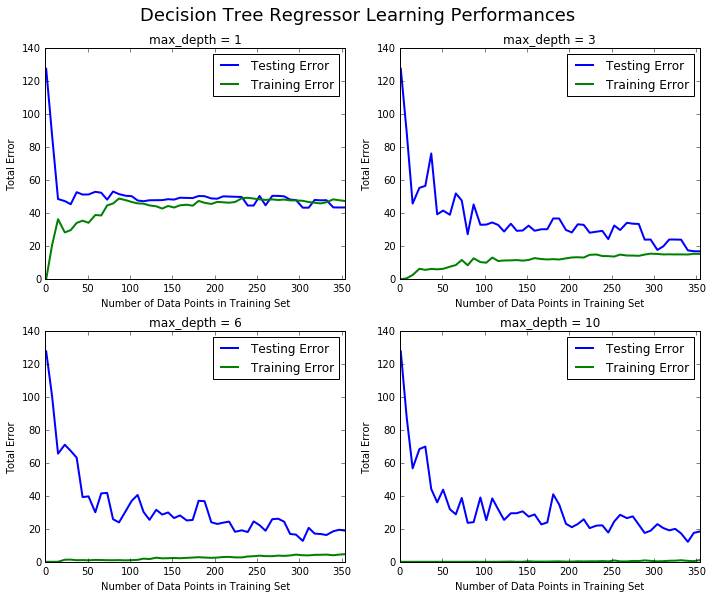

In [14]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer:**

**   Using the second graph, the max depth of the chosen model is 3. As the size of the training set increases, the training error increases as well. This can be expected because as the training set is increased, the model is forced to create a more and more complicated graph(unless the data is perfectly correlated), which makes it more and more likely that there will be a higher training error due to the complexity in the graph, but also the need for generalization to have a low testing error as well. **
   
**   If we were to create a graph that modeled each training data perfectly, we might be able to do so but it could be incredibly complicated, take an extremely long time to find, and then perform terribly on new testing data because it was so overfitted. The price you pay for generalization and a higher test score though is a higher training error because to generalize well, it can't fit each point perfectly which causes the training error to increase and the more training points you add, the more points you have that don't perfectly fit your model, i.e., increasing training error.**
   
**   The testing error has a sharp decrease in error at the beginning because as more training points are added, the more accurate your model can become. For example, if you think about an extremely simple example, we have two points, [0,0] and [1,1]. It might be that this will be a perfect linear model where the next point is [2,2] but you simply don't have enough data to be sure and with this few amount of data points, your likely to be wrong when fitting the model, which drastically increases your testing error. But as the training points increase, your model has a chance to really see whats happening in the data and the testing error drops drastically quickly but soon levels out.**
   
**   This leveling out in the testing data happens because you want to create the most accurate model with the simplest solution and often after you reach a certain amount of data, increasing the data only really affirms your prediction model. This can happen due to the fact that it's unlikely that after a certain number of data points that your model will drastically be altered in a way that wasn't shown in the first few hundred points.**

**   The training error in the long run will also level out because given the data is independently and identically distributed(IID), once the model has correctly identified a valid modeling function, the data shouldn't be throwing any significant changes that would cause an increase in error. This type of significant change is possible when you have few points and therefore can't possibly model the function properly yet, but once you reach a certain point, like after 350 points for our model, the training and testing error will converge because we've seen enough points to make a proper formula for our model.**

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer:**

**In the max depth 1 graph, the model suffers from high bias(aka. underfitting). It suffers from this because the model is so general, that it misses important information from features and its relationship on the target outputs. You can tell this model suffers from underfitting because of the very high training error that is actually greater than the testing error at the end of the graph. **

**In the max depth 10 graph, the model suffers from high variance(aka. overfitting). It suffers from this because the model is so exact on the training data, that it can't generalise well to unseen data. It does this because it doesn't account for enough error in the training model and actually models what should be seen as error, so it's too exact and can't handle unseen data that may not suffer from the same error. You can tell this model suffers from high variance because of the extremely low(almost zero) training error while the testing error is up around 20. In overfitting you can notice overfitting if there's a significant difference in the training and testing error.**

**If your graph fits well and doesn't over or underfit, you'd see testing and training error that are relatively the same, but unlike graph 1, the errors would be low to show that its complex enough to keep the error rate low, but general enough to keep the testing error low as well. **

Creating a model complexity graph. . . 


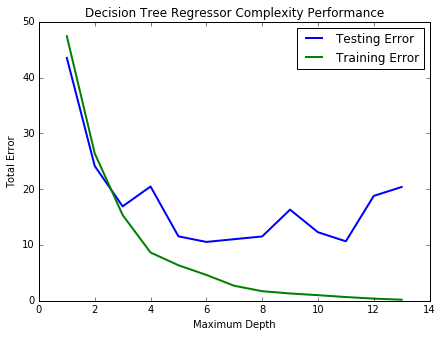

In [15]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer:**

**   For the model complexity graph, the error curves relate to it because as the maximum depth increases, the complexity increases. As the complexity increases initially, it provides a sharp decrease in the total error but soon the testing error curve will level and then will actually continuously increase due to the fact that as maximum depth increases(complexity), overfitting starts to occur and as overfitting occurs, training error will decrease to zero while testing error will increase substantially. **

**   You could actually find the optimum maximal depth by simply looking at the testing error and looking for the global minimum but it helps to keep the training error in mind as well to make sure that your graph is complex enough to have a low training error as well. This model complexity graph is able to provide us with information on what is the optimal max depth for our model by looking for the global minimum in the testing curve and can also tell us what error rate for both data sets we'd be looking at, at that specific depth level.**

**   Based on the graph, my interpretation is that to get the model that best generalizes the data, I'd choose a max depth of about 6. It's at this depth the the testing error reaches a global minimum. If we chose a higher depth level, we'd actually get a higher testing error due to overfitting in the model. It would also add unneeded complexity to the model, that clearly isn't necessary and is actually worse for the predictions. **

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [16]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 6}


**Answer:**

**Using grid search, it found that the optimal max depth is 6. This result is the same as what my intuition tells me. **

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [17]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.445


**Answer:**

   **The best selling price for the client's home is 21.445(or 21,445 dollars). Compared to the basic stats calculated, it fell within 1 standard deviation. According to our stats, the mean average of the home prices was 22.533 and the standard deviation was 9.188. What this means is that roughly 68% of our data will fall between 13.345 and 31.721. As 21.445 falls within that range it means its within 1 standard deviation from the mean. This bodes well for our prediction because we have a statistically lower chance of being wrong and wildly mispricing our house.**
   
**   In this case even if we're wrong, were statistically likely to only being wrong by a smaller amount. However when talking home prices, even a small error can be drastic because it could mean either selling your house than less than you could have gotten, which when talking about homes, one of the most valuable things you'll ever own, its best to be spot on. Because we're so close to the mean average, it bodes well for our prediction since most homes are priced right around this number and there's a higher likelihood this is the correct selling price. **

##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **

**   I would use this model to predict the selling price of our home for a couple reasons. **

**   The first is that it decision trees allows us to use only the most important features. For example(as was pointed out to me in the review by Diego), if I wanted to use the N most important features, I could just go to a max depth of N and because decision trees use the features with the highest information gain, it would in turn only use those N features. This would allow for the model to disregard features that had no correlation to the housing prices, so features that didn't matter wouldn't be used.**

**   The second reason is because the use of grid search allowed us to automatically pick the perfect amount of depth to use(ie features), which goes back to the first argument of only using the important features. Through the use of grid search, it was able to choose the hyperparameters with the lowest error rate and therefore only use a certain number of features that provided the most information gain. **